# <b>1.0 <span style='color:red'>|</span> Import Packages </b> <a class="anchor" id="1.0"></a>

In [1]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as mpatches

In [2]:
base_dir  = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/'
os.chdir(base_dir)

# <b>2.0 <span style='color:red'>|</span> Show Number of Images Per Label </b> <a class="anchor" id="2.0"></a>

In [3]:
# to list every directory name (label name)
directories_list = tf.io.gfile.listdir(base_dir)

# get number of labels
len_labels = len(directories_list)
print(f"Total Class Labels = {len_labels}")

vis_images = []; vis_labels =[]
length_file_list = []; label_list = []

for item in directories_list:
    
    # get each label directory
    item_dir = os.path.join(base_dir, item)
    # get list of images of each label
    item_files = os.listdir(item)
    # number of images per label
    len_per_label = len(os.listdir(item))
    
    length_file_list.append(len_per_label)
    label_list.append(item)
    
    # get first image of each label (for visualisation purpose)
    vis_images.append(os.path.join(item_dir, item_files[0]))
    # get respective label name (for visualisation purpose)
    vis_labels.append(item)

df_temp = pd.DataFrame({'Labels':label_list, 'Number of Images':length_file_list}).\
sort_values(by='Number of Images', ascending=False)
df_temp

Total Class Labels = 30


,Labels,Number of Images
16,Pearl_millet(bajra),39
8,Tobacco-plant,33
26,Cherry,32
24,cotton,32
13,maize,31
25,banana,31
22,Cucumber,31
14,wheat,31
15,soyabean,30
2,clove,30


# <b>3.0 <span style='color:red'>|</span> Show Sample Images of Each Label </b> <a class="anchor" id="3.0"></a>

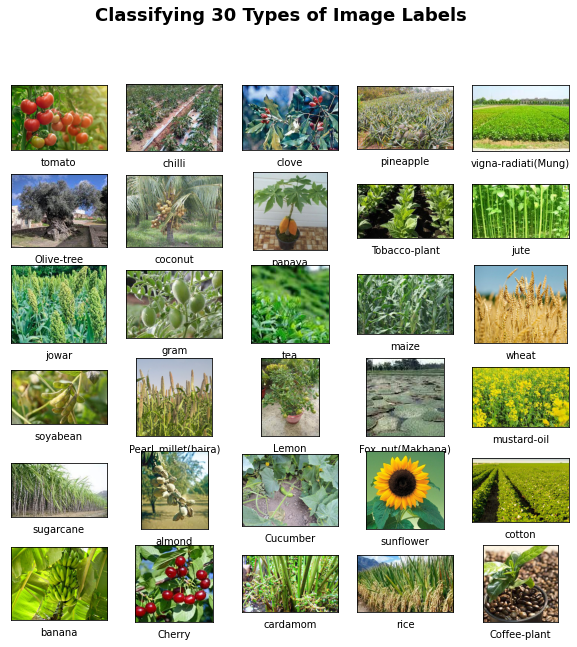

In [4]:
plt.figure(figsize=(10,10))
for i in range(len(vis_labels)):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = mpimg.imread(vis_images[i])
    plt.imshow(img)
    plt.xlabel(vis_labels[i])
    plt.suptitle(f"Classifying {len_labels} Types of Image Labels",fontsize=18, fontweight='bold')
plt.show()

# <b>4.0 <span style='color:red'>|</span> Split Data for Training and Validation </b> <a class="anchor" id="4.0"></a>

In [5]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    selected_file_names = []
    all_file_names = os.listdir(SOURCE_DIR)
    for file_name in all_file_names:
        file_path = os.path.join(SOURCE_DIR, file_name)
        size = os.path.getsize(file_path)
        if size != 0:
              selected_file_names.append(file_name)
        else:
              print(f"{file_name} is zero length, so ignoring.")

    random.seed(42)
    selected_train_files = random.sample(selected_file_names, int(SPLIT_SIZE * len(selected_file_names)))
    selected_val_files = [x for x in selected_file_names if x not in selected_train_files]

    for file_name in selected_train_files:
        source = os.path.join(SOURCE_DIR, file_name)
        destination = os.path.join(TRAINING_DIR, file_name)
        copyfile(source, destination)

    for file_name in selected_val_files:
        source = os.path.join(SOURCE_DIR, file_name)
        destination = os.path.join(VALIDATION_DIR, file_name)
        copyfile(source, destination)


In [6]:
def create_train_val_dirs(root_path, split_size = 0.9):
    for item in directories_list:
        source_dir = os.path.join(base_dir, item)
        training_dir = os.path.join(root_path, f'_MODELLING/training/{item}')
        validation_dir = os.path.join(root_path, f'_MODELLING/validation/{item}')

        # Create EMPTY directory
        os.makedirs(training_dir)
        os.makedirs(validation_dir)
        
        split_data(source_dir, training_dir, validation_dir, split_size)
    print(f"Created training and validation directories containing images at split size of {split_size}")

In [7]:
create_train_val_dirs('/kaggle/working', split_size = 0.9)

Created training and validation directories containing images at split size of 0.9


# <b>5.0 <span style='color:red'>|</span> Image Data Generator </b> <a class="anchor" id="5.0"></a>

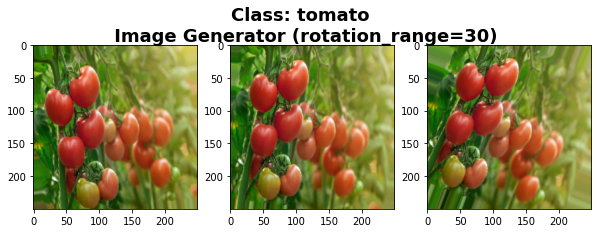

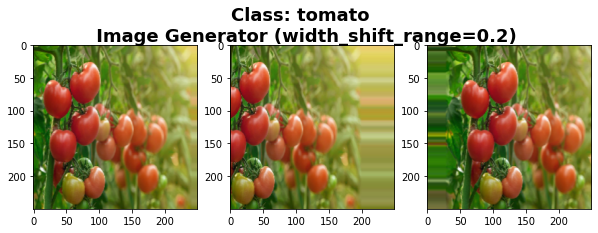

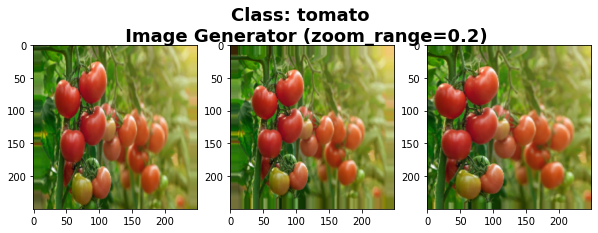

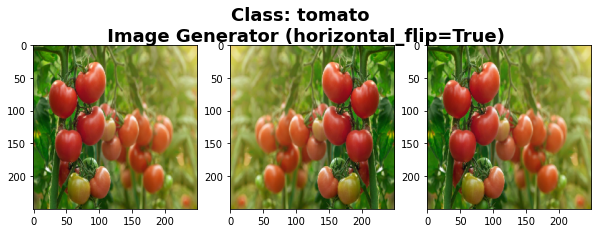

In [8]:
def show_ImageDataGenerator(vis_images, vis_labels, image_index):
    #Loads image in from the set image path
    class_label = vis_labels[image_index]
    img = tf.keras.preprocessing.image.load_img(vis_images[image_index], target_size= (250,250))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    #Creates our batch of one image
    def show_image(datagen, param):
        pic = datagen.flow(img_tensor, batch_size =1)
        plt.figure(figsize=(10,3.5))
        #Plots our figures
        for i in range(1,4):
            plt.subplot(1, 3, i)
            batch = pic.next()
            image_ = batch[0].astype('uint8')
            plt.imshow(image_)
        plt.suptitle(f"Class: {class_label} \n Image Generator ({param})",fontsize=18, fontweight='bold')

        plt.show()

    datagen = ImageDataGenerator(rotation_range=30)
    show_image(datagen, "rotation_range=30")

    datagen = ImageDataGenerator(width_shift_range=0.2)
    show_image(datagen, "width_shift_range=0.2")

    datagen = ImageDataGenerator(zoom_range=0.2)
    show_image(datagen, "zoom_range=0.2")

    datagen = ImageDataGenerator(horizontal_flip=True)
    show_image(datagen, "horizontal_flip=True")

show_ImageDataGenerator(vis_images, vis_labels, image_index = 0)

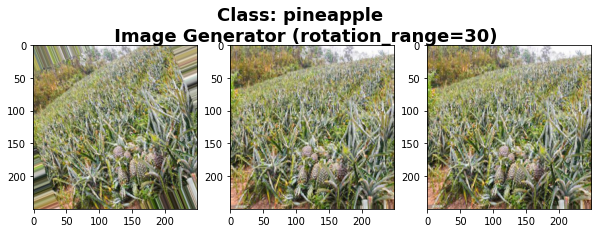

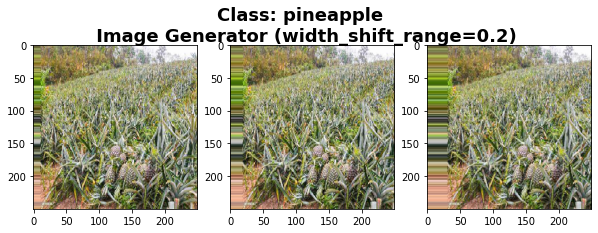

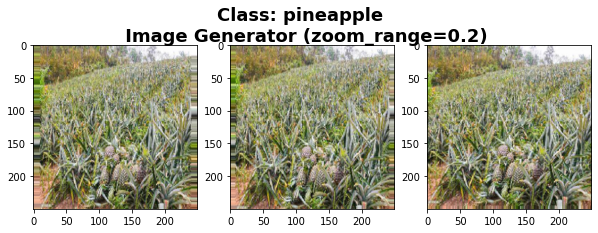

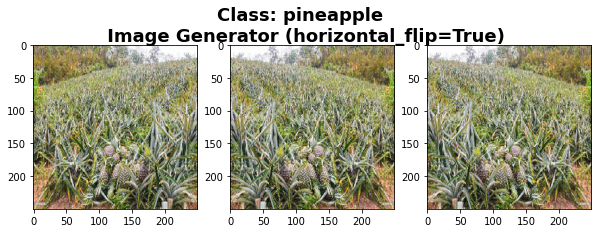

In [9]:
show_ImageDataGenerator(vis_images, vis_labels, image_index = 3)

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

    # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
    train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
    return train_generator, validation_generator

In [11]:
training_dir = os.path.join('/kaggle/working', '_MODELLING', 'training')
validation_dir = os.path.join('/kaggle/working', '_MODELLING', 'validation')

print(validation_dir)

/kaggle/working/_MODELLING/validation


In [12]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 731 images belonging to 30 classes.
Found 98 images belonging to 30 classes.



# <b>Architecture 1 <span style='color:red'>|</span> Basic Deep Convolutional Neural Network </b> <a class="anchor" id="5.0"></a>

In [13]:
model_1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len_labels, activation='softmax')
])

# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dropout (Dropout)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8

In [14]:
# Define a Callback class that stops training once accuracy reaches 80%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.8):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [15]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
history_1 = model_1.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 29s 1s/step - loss: 4.8775 - accuracy: 0.0301 - val_loss: 3.3651 - val_accuracy: 0.0612
Epoch 2/20
23/23 [==============================] - 27s 1s/step - loss: 3.3065 - accuracy: 0.0739 - val_loss: 3.1684 - val_accuracy: 0.1020
Epoch 3/20
23/23 [==============================] - 27s 1s/step - loss: 3.1441 - accuracy: 0.1081 - val_loss: 3.0700 - val_accuracy: 0.1327
Epoch 4/20
23/23 [==============================] - 27s 1s/step - loss: 3.0415 - accuracy: 0.1382 - val_loss: 2.9392 - val_accuracy: 0.1939
Epoch 5/20
23/23 [==============================] - 27s 1s/step - loss: 3.0011 - accuracy: 0.1423 - val_loss: 2.9832 - val_accuracy: 0.2041
Epoch 6/20
23/23 [==============================] - 27s 1s/step - loss: 2.9143 - accuracy: 0.1669 - val_loss: 2.8916 - val_accuracy: 0.2245
Epoch 7/20
23/23 [==============================] - 27s 1s/step - loss: 2.8595 - accuracy: 0.1765 - val_loss: 2.8162 - val_accuracy: 0.2245
Epoch 8/20
23/23 [==

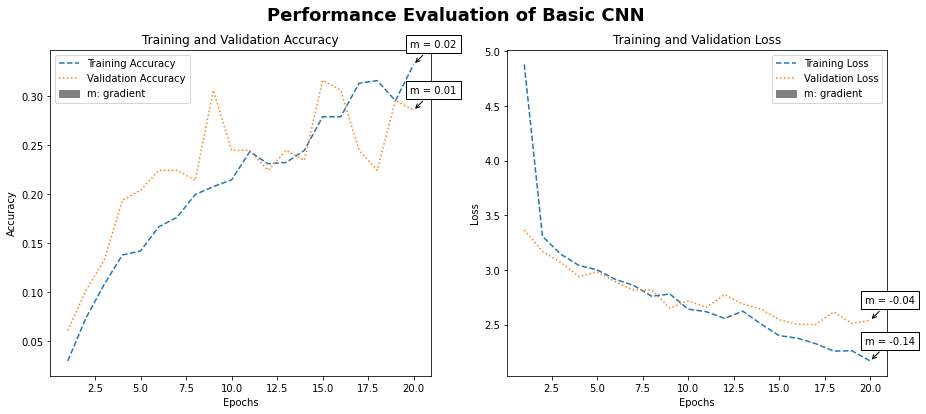

In [17]:
def vis_evaluation(history_dict, model_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    epochs = range(1, len(history_dict['accuracy'])+1)

    def get_gradient(y_arr, epochs):
        return round((y_arr[-1] - y_arr[0]) / (epochs[-1] - epochs[0]),2)

    def vis_sub_evaluation(n, Accuracy, train_acc, val_acc, epochs):
        axs[n].plot(epochs, train_acc, label=f'Training {Accuracy}', ls='--')
        axs[n].plot(epochs, val_acc, label=f'Validation {Accuracy}', ls='dotted')

        axs[n].set_title(f'Training and Validation {Accuracy}')
        axs[n].set_xlabel('Epochs')
        axs[n].set_ylabel(Accuracy)
        
        handles, labels = axs[n].get_legend_handles_labels()
        m_patch = mpatches.Patch(color='grey',label='m: gradient')
        handles.append(m_patch) 
        axs[n].legend(handles=handles)
        
        def annotate_box(train_acc):
            return AnnotationBbox(TextArea(f"m = {get_gradient(train_acc, epochs)}"), (epochs[-1], train_acc[-1]),
                            xybox=(20, 20),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axs[n].add_artist(annotate_box(train_acc))
        axs[n].add_artist(annotate_box(val_acc))

    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    vis_sub_evaluation(0, 'Accuracy', train_acc, val_acc, epochs)

    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    vis_sub_evaluation(1, 'Loss', train_loss, val_loss, epochs)
    
    plt.suptitle(f"Performance Evaluation of {model_name}",fontsize=18, fontweight='bold')
    plt.show()
    
history_dict_1 = history_1.history
vis_evaluation(history_dict_1, 'Basic CNN')

# <b>Architecture 2 <span style='color:red'>|</span> Transfer Learning using VGG16 </b> <a class="anchor" id="7.0"></a>

In [18]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(include_top=False,weights='imagenet', input_shape=(150, 150, 3))
for layer in pre_trained_model.layers:
    layer.trainable = False
    
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

58900480/58889256 [==============================] - 0s 0us/step
There are 14,714,688 total parameters in this model.
There are 0 trainable parameters in this model.


In [19]:
last_output = pre_trained_model.output
print('last layer output: ', last_output)

# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")
The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [20]:
from tensorflow.keras import Model
def transfer_learning(last_output, pre_trained_model):
    # Flatten the output layer to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)
    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.3
    x = tf.keras.layers.Dropout(0.3)(x)  
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(len_labels, activation='softmax')(x)          
    # Create the complete model by using the Model class
    model = Model(inputs=pre_trained_model.input, outputs=x)
    
    return model

In [21]:
model_2 = transfer_learning(last_output, pre_trained_model)
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [22]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
history_2 = model_2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks=callbacks)

Epoch 1/20
23/23 [==============================] - 88s 4s/step - loss: 3.9290 - accuracy: 0.0985 - val_loss: 2.9773 - val_accuracy: 0.1224
Epoch 2/20
23/23 [==============================] - 86s 4s/step - loss: 2.6494 - accuracy: 0.2421 - val_loss: 2.6048 - val_accuracy: 0.2857
Epoch 3/20
23/23 [==============================] - 86s 4s/step - loss: 2.3667 - accuracy: 0.3160 - val_loss: 2.3187 - val_accuracy: 0.3776
Epoch 4/20
23/23 [==============================] - 87s 4s/step - loss: 2.0567 - accuracy: 0.4268 - val_loss: 2.1864 - val_accuracy: 0.4490
Epoch 5/20
23/23 [==============================] - 86s 4s/step - loss: 1.8814 - accuracy: 0.4679 - val_loss: 2.0791 - val_accuracy: 0.3980
Epoch 6/20
23/23 [==============================] - 85s 4s/step - loss: 1.8207 - accuracy: 0.4624 - val_loss: 1.9134 - val_accuracy: 0.4898
Epoch 7/20
23/23 [==============================] - 89s 4s/step - loss: 1.6968 - accuracy: 0.5103 - val_loss: 1.8363 - val_accuracy: 0.5000
Epoch 8/20
23/23 [==

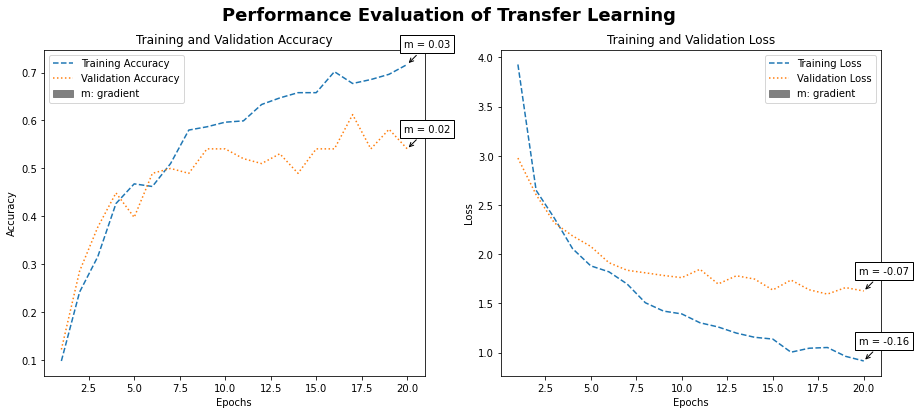

In [24]:
history_dict_2 = history_2.history
vis_evaluation(history_dict_2, 'Transfer Learning')